In [1]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, Operator
from qiskit_aer import AerSimulator
from qiskit import transpile
import pylatexenc

import matplotlib.pyplot as plt

import numpy as np
import math
from itertools import combinations

In [2]:
import qc_sudoku

In [3]:
puzzle = np.array([[2,0,3,1],[1,np.nan,np.nan,0],[0,np.nan,np.nan,np.nan],[3,np.nan,np.nan,2]])
puzzle

array([[ 2.,  0.,  3.,  1.],
       [ 1., nan, nan,  0.],
       [ 0., nan, nan, nan],
       [ 3., nan, nan,  2.]])

In [4]:
for x in np.nditer(puzzle):
    print(x)

2.0
0.0
3.0
1.0
1.0
nan
nan
0.0
0.0
nan
nan
nan
3.0
nan
nan
2.0


In [5]:
qc_sudoku.find_nqubits_per_entry(puzzle)

2

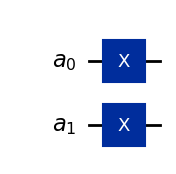

In [6]:
qc_sudoku.value_to_ancilla(3,2).draw("mpl")

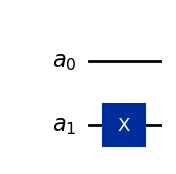

In [7]:
qc_sudoku.value_to_ancilla(2,2).draw("mpl")

In [8]:
for x in np.nditer(puzzle):
    if not math.isnan(x):
        print(x)

2.0
0.0
3.0
1.0
1.0
0.0
0.0
3.0
2.0


In [9]:
bitstr = "01"
print(bitstr)
bitstr = bitstr[::-1]
print(bitstr)

01
10


In [10]:
qc = qc_sudoku.prepare_known_ancilla(puzzle)

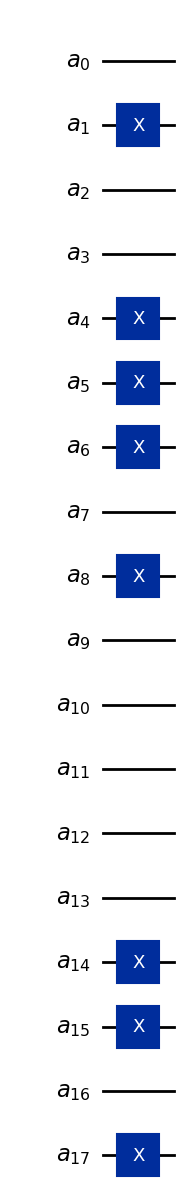

In [11]:
qc.draw("mpl")

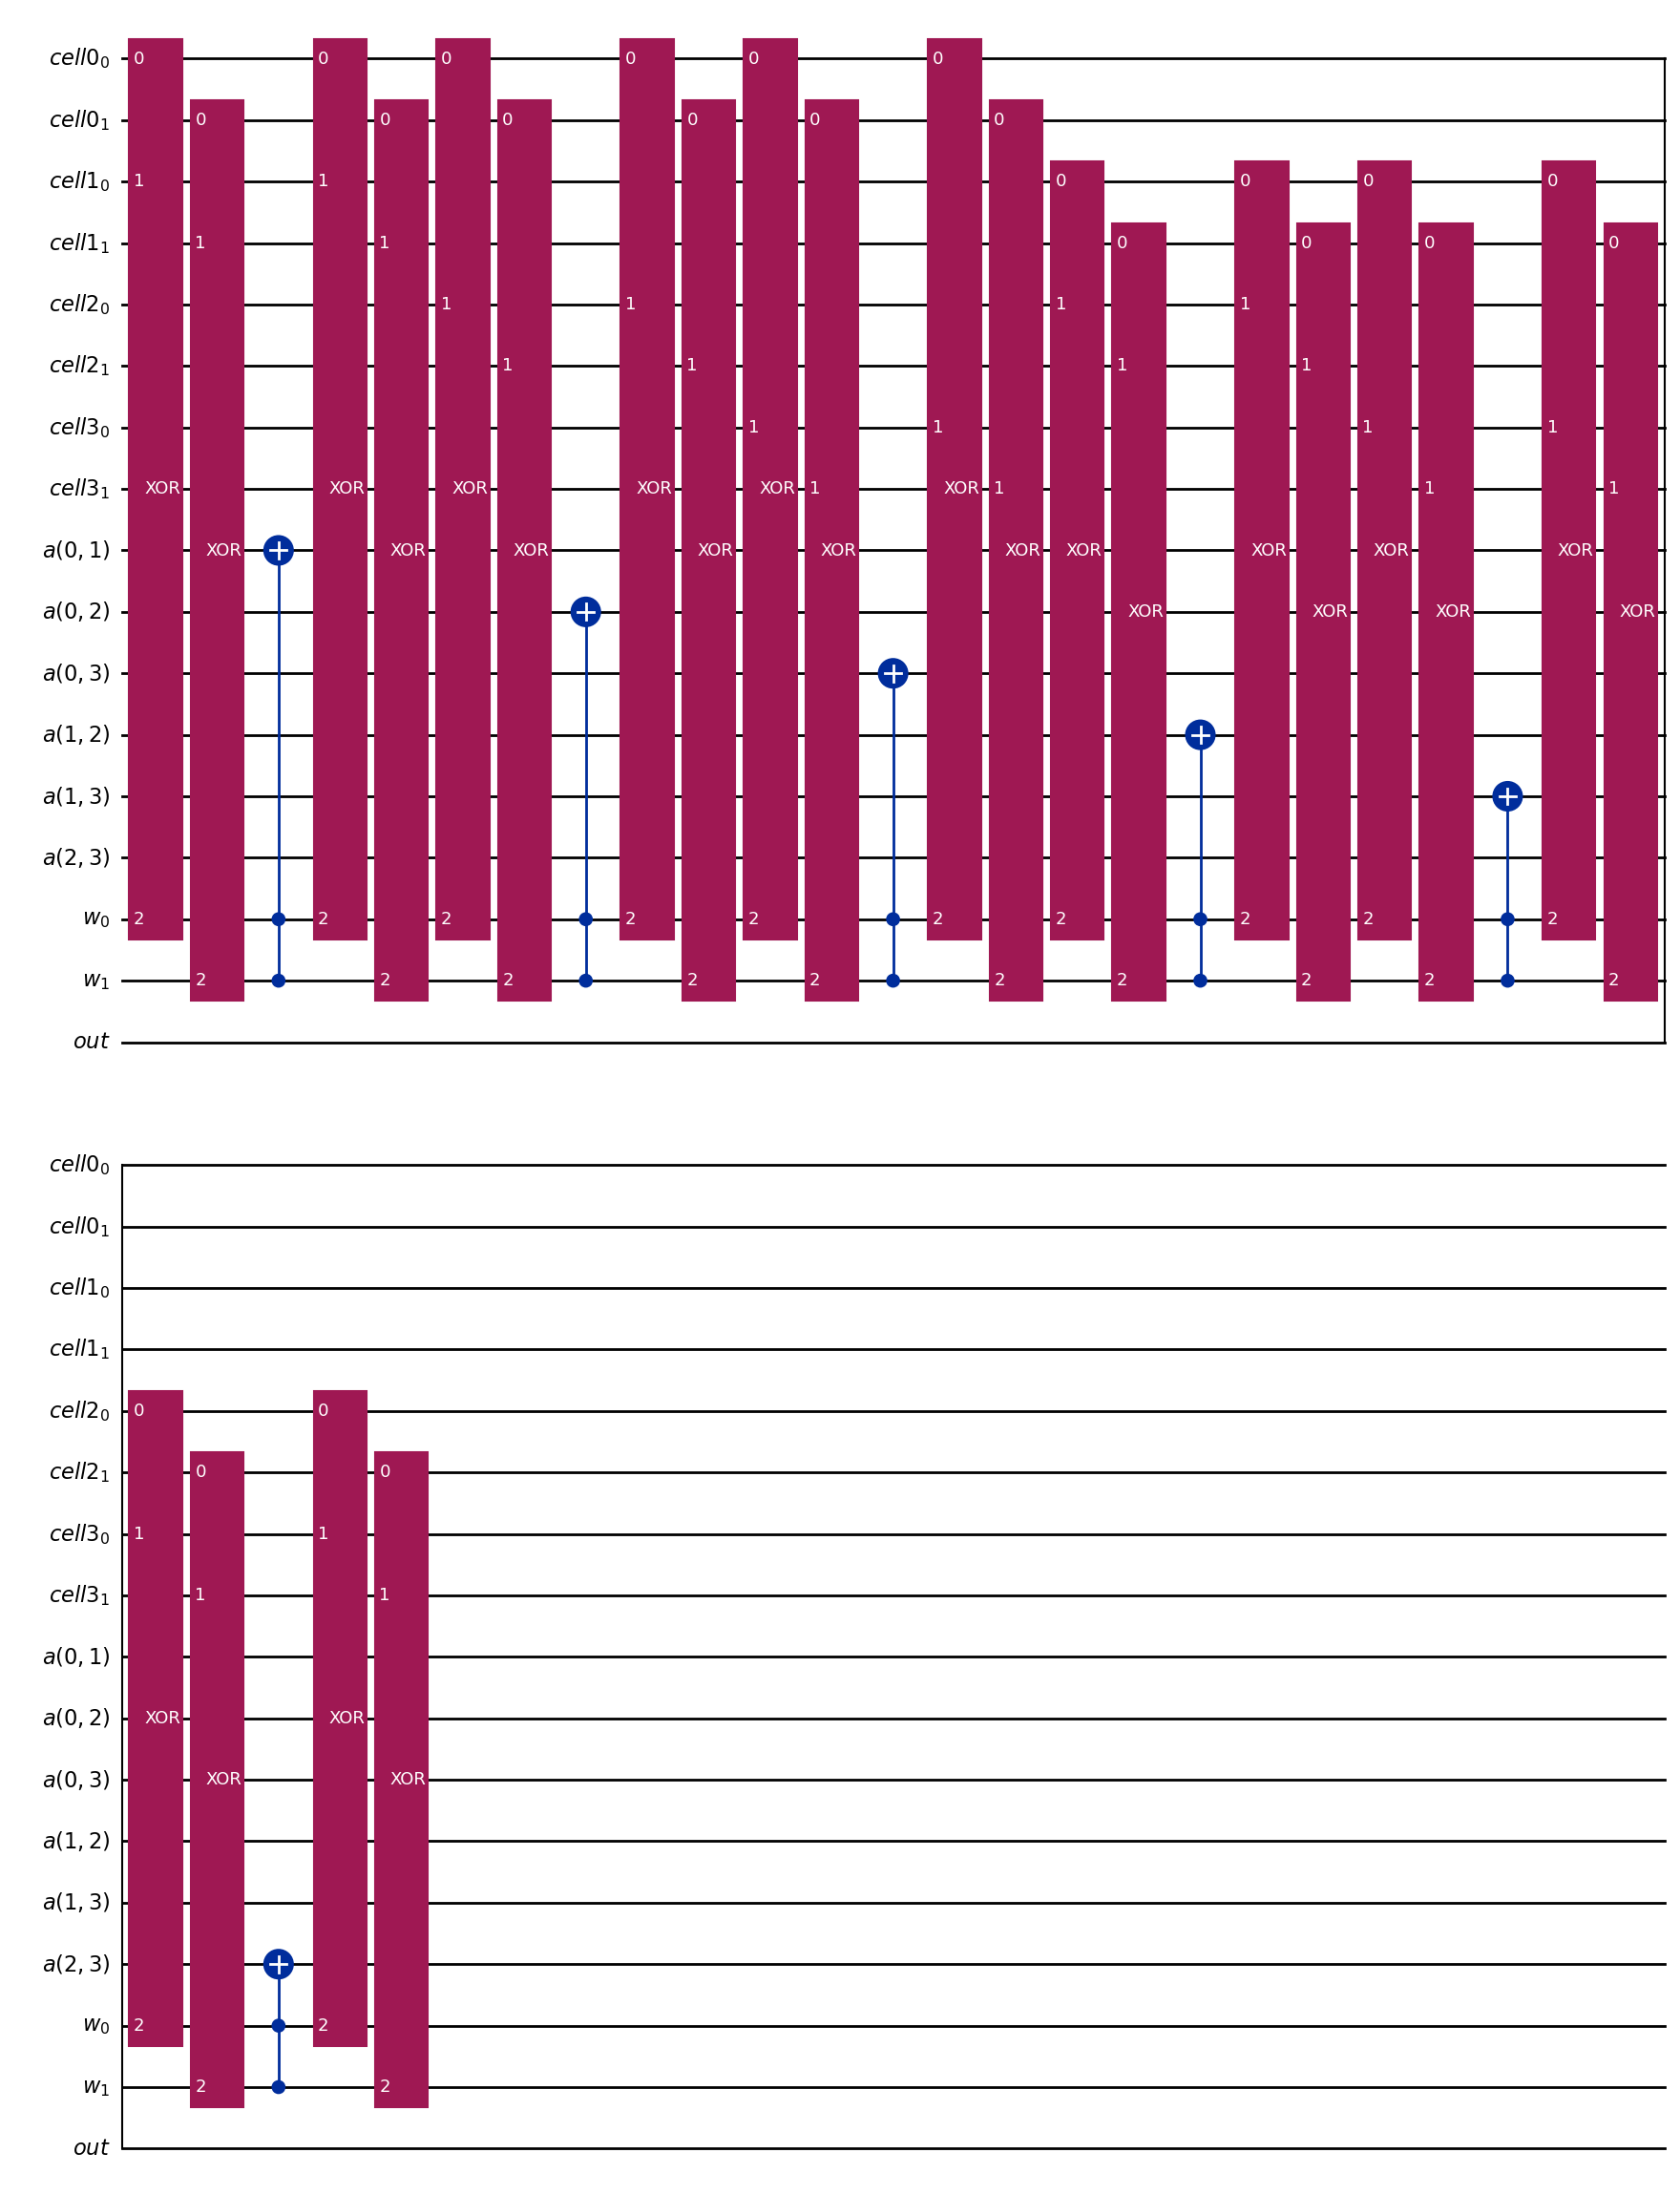

In [12]:
nqubits = 2
ncells = 4

cell_regs = [QuantumRegister(nqubits, name="cell{}".format(str(i)))
                    for i in range(ncells)]
ancilla_dict = {(i,j): AncillaRegister(1, name="a({},{})".format(str(i),str(j)))
                    for (i,j) in combinations(range(ncells),2)}
work_qr = QuantumRegister(nqubits, name="w")
out_qr = AncillaRegister(1, name="out")

qc = QuantumCircuit(*cell_regs, *ancilla_dict.values(), work_qr, out_qr,
                        name="Is valid group")

for (i,j) in list(combinations(range(ncells),2)):
    qc.compose(qc_sudoku.is_equal(nqubits),
                qubits=[*(cell_regs[i]),
                        *(cell_regs[j]),
                        *(ancilla_dict.get((i,j))),
                        *work_qr],
                inplace=True)

qc.draw("mpl")

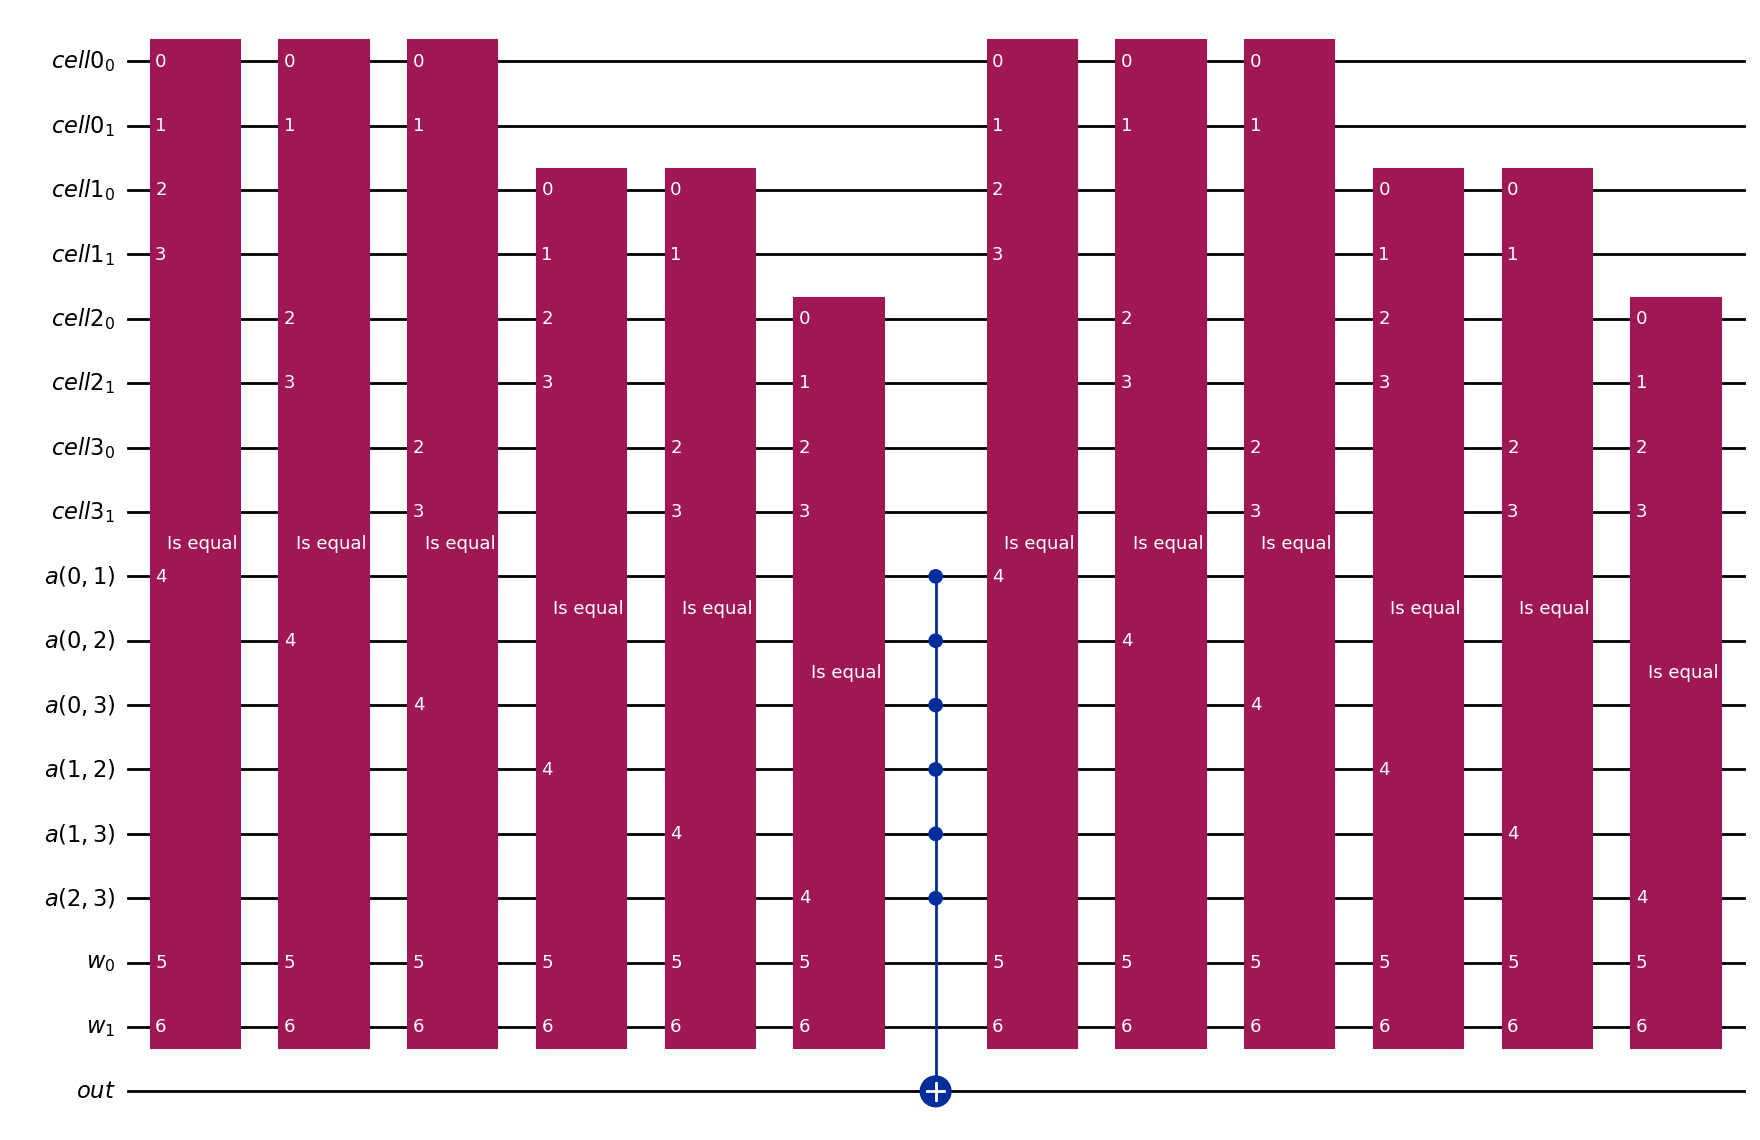

In [13]:
qc_sudoku.is_valid_group(2,4).draw("mpl")

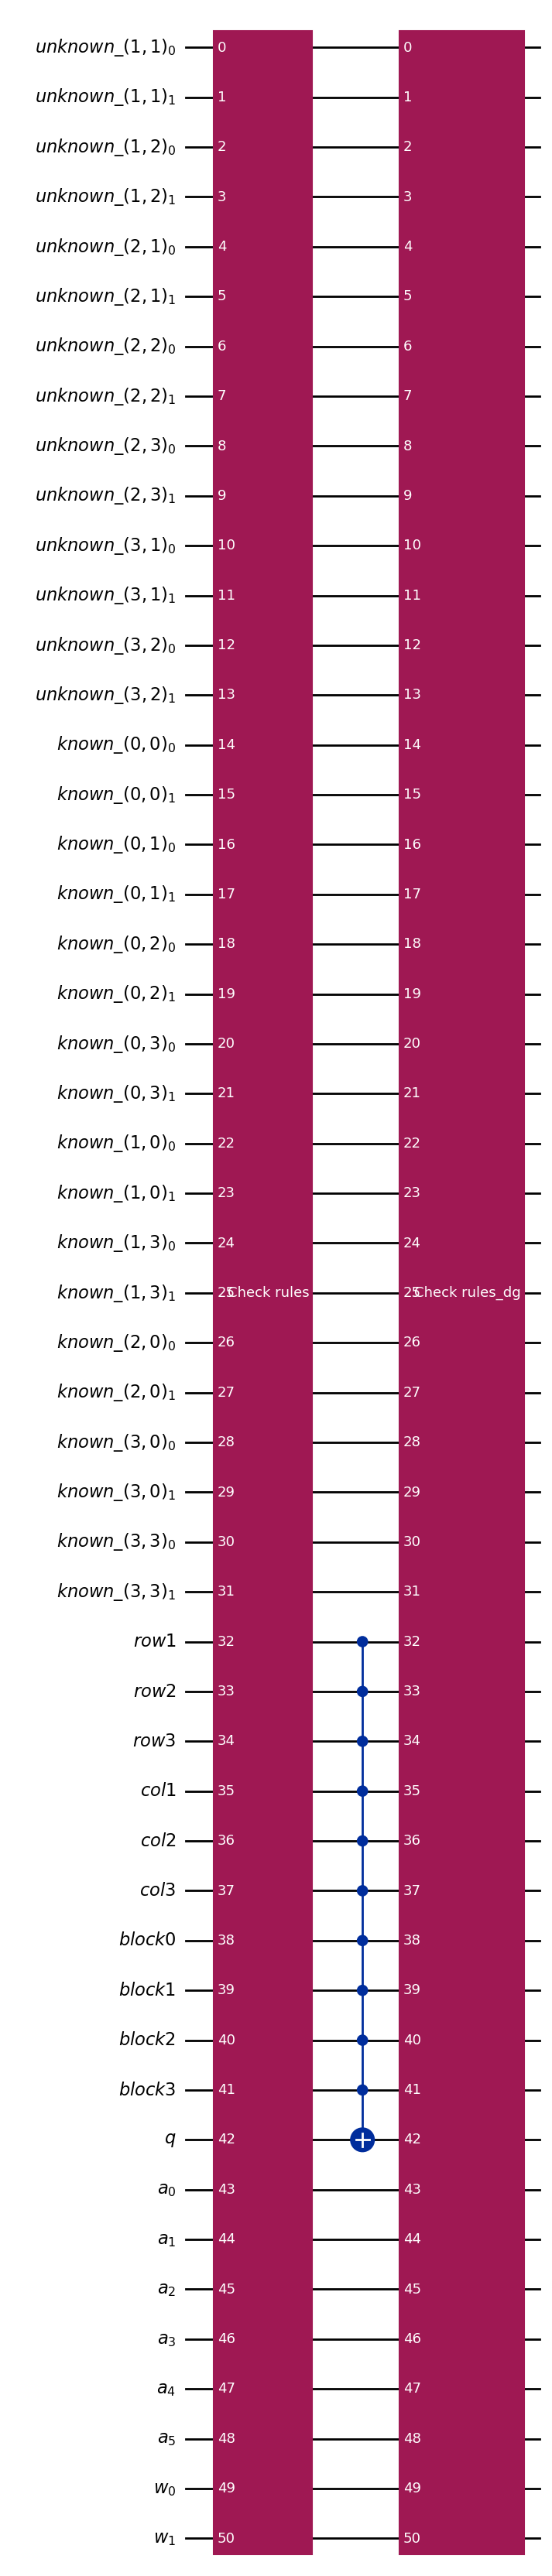

In [14]:
qc_sudoku.oracle(puzzle).draw("mpl")

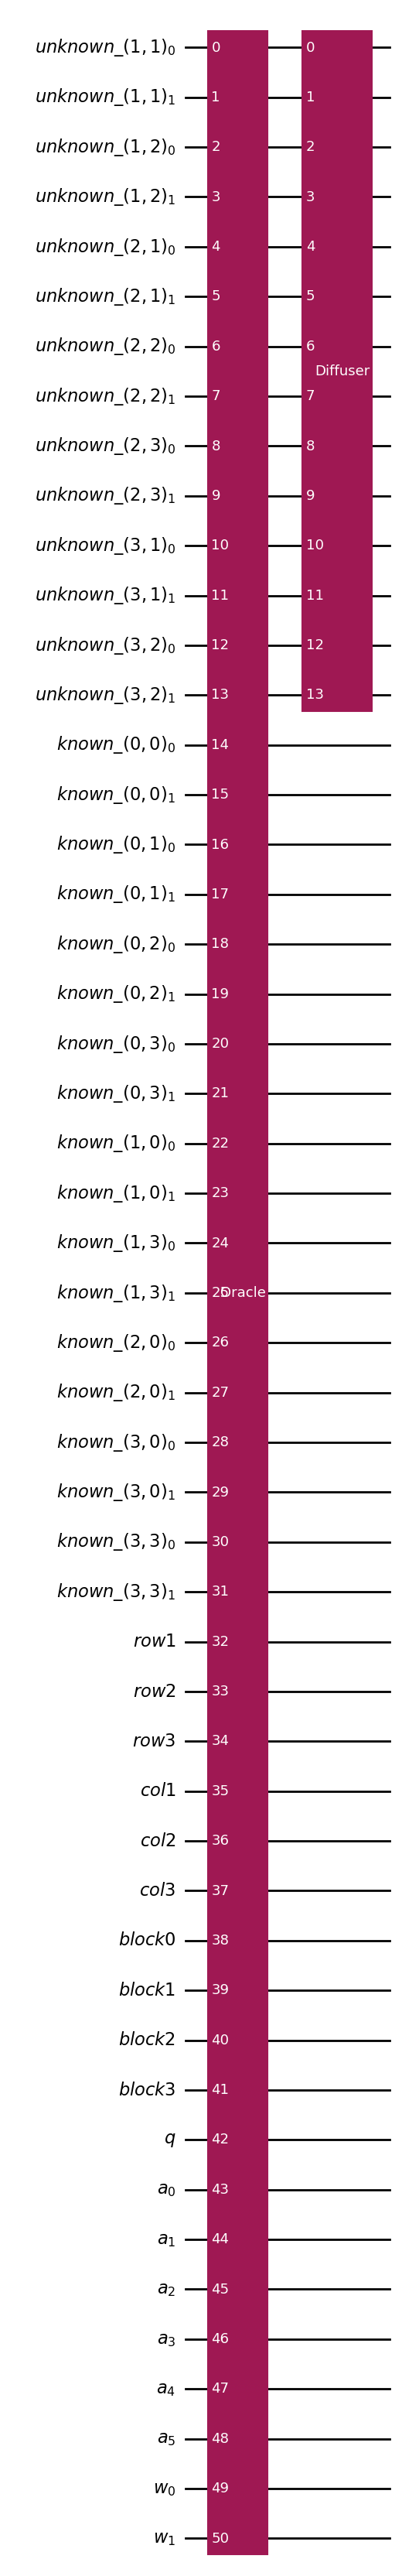

In [15]:
qc_sudoku.grover_iteration(puzzle).draw("mpl")

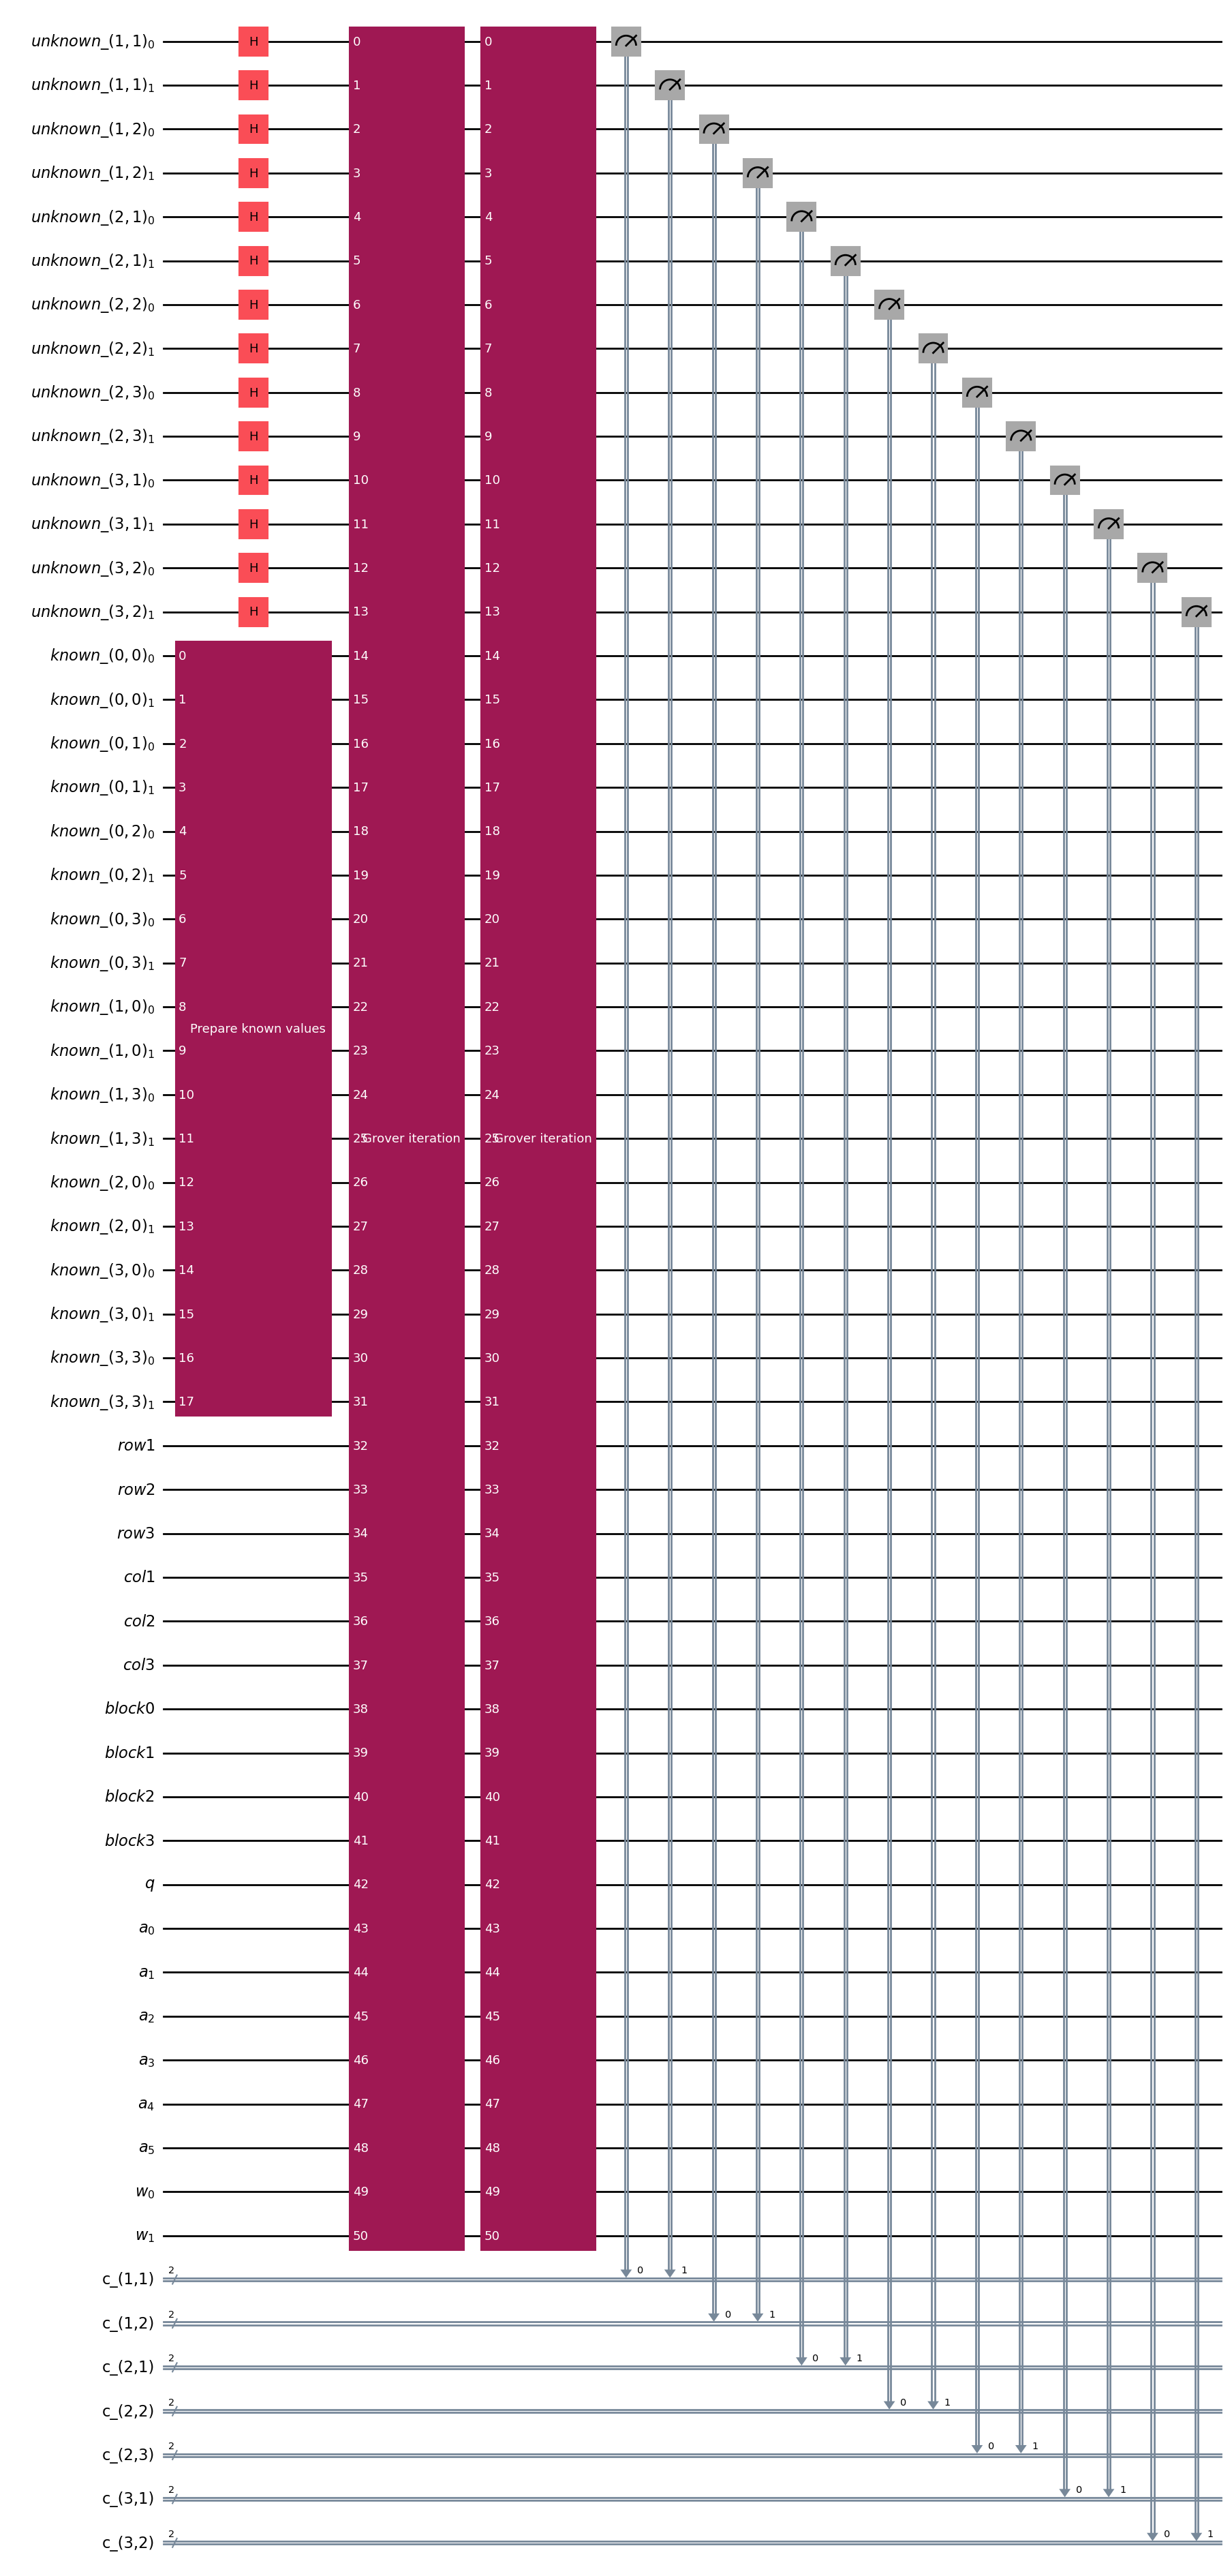

In [16]:
qc_sudoku.grover(puzzle,2).draw("mpl")

In [17]:
qc_sudoku.is_sq_matrix(puzzle)

True

In [18]:
puzzle_nums = np.nan_to_num(puzzle)
np.all((puzzle_nums > -1) | (puzzle_nums < 4))

np.True_

In [19]:
qc_sudoku.possibly_sudoku(puzzle)

np.True_

In [20]:
#Statevector(qc_sudoku.grover(puzzle, 2))

In [21]:
#qc_sudoku.solve(puzzle)

In [22]:
nqubits_per_entry = qc_sudoku.find_nqubits_per_entry(puzzle)
num_unknown = qc_sudoku.find_num_unknown(puzzle)
nqubits = nqubits_per_entry * num_unknown
niter = math.ceil(math.pi * math.sqrt(2**nqubits) / 4)

In [23]:
simulator = AerSimulator()
simulator.set_max_qubits(51)
compiled_circuit = transpile(qc_sudoku.grover(puzzle,niter), simulator)

In [25]:
job = simulator.run(compiled_circuit, shots=1)
counts = job.result().get_counts()

counts

QiskitError: 'ERROR:  [Experiment 0] Insufficient memory to run circuit Grover circuit using the statevector simulator. Required memory: 34359738368M, max memory: 16384M ,  ERROR: Insufficient memory to run circuit Grover circuit using the statevector simulator. Required memory: 34359738368M, max memory: 16384M'